In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.shape

(768, 9)

In [7]:
col=list(df.columns)

In [8]:
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [9]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

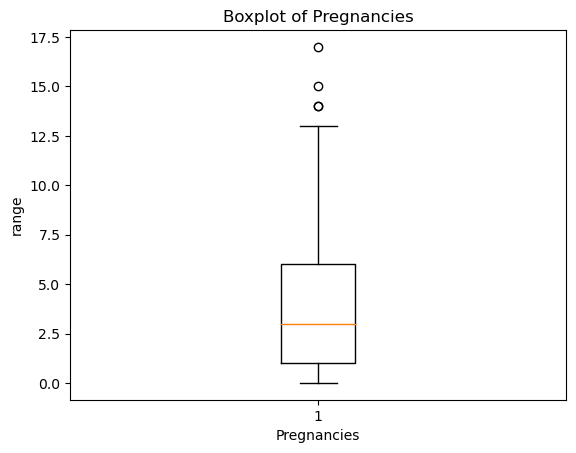

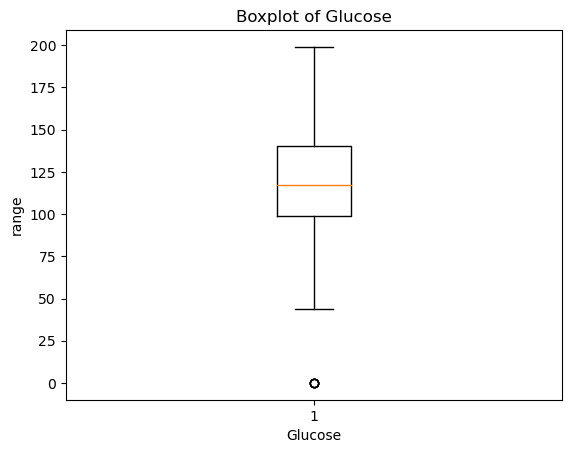

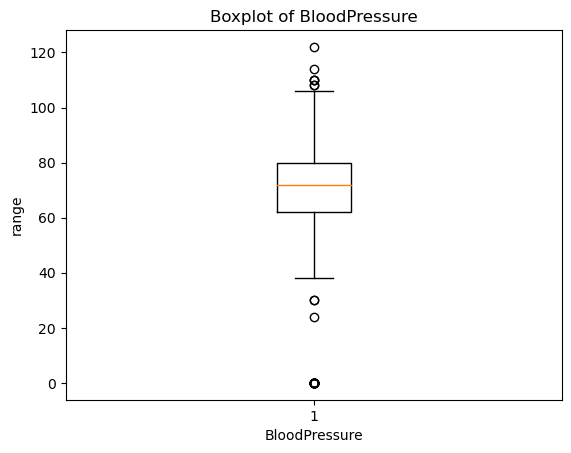

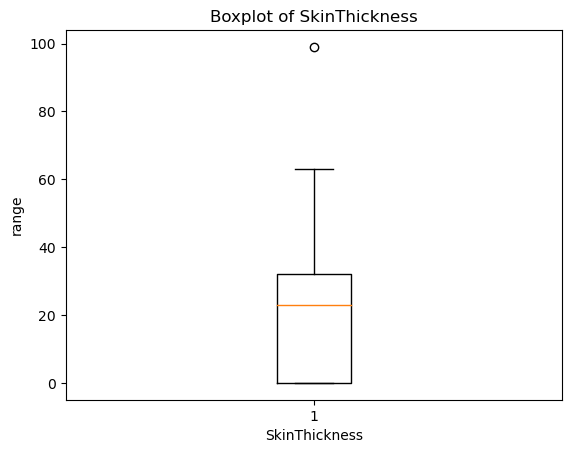

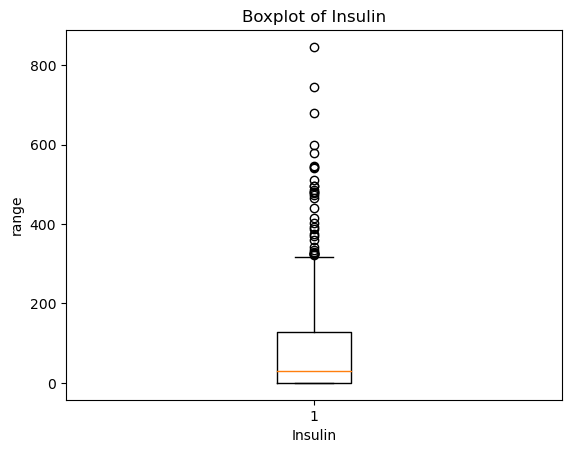

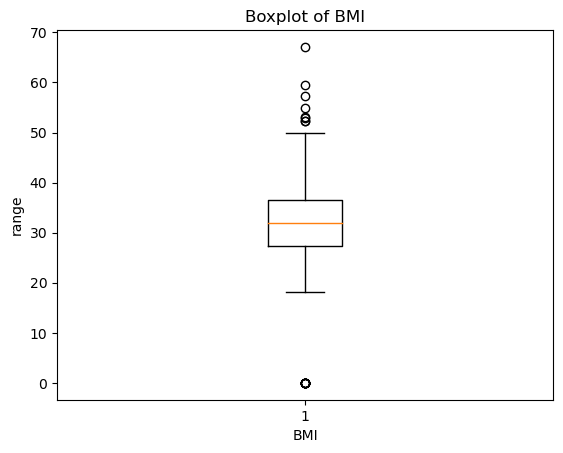

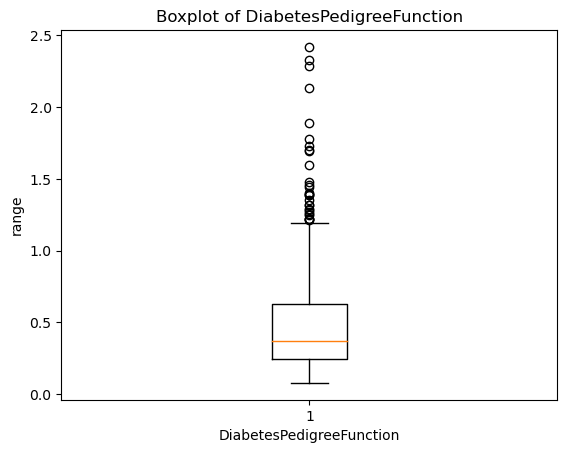

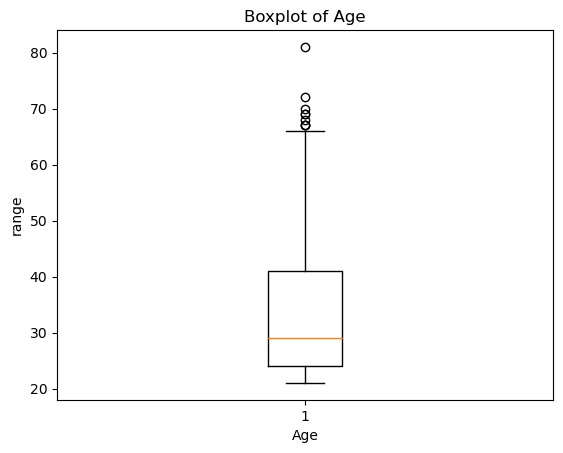

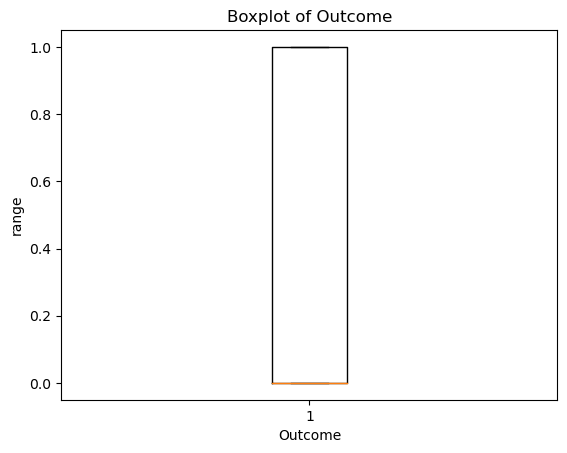

In [11]:
import numpy as np

for i in col:
    if df[i].dtype == np.int64 or df[i].dtype == np.float64:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('range')
        plt.title(f'Boxplot of {i}')
        plt.show()

In [12]:
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    df=df[(df[i]>=lf)&(df[i]<=uf)]

In [13]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [14]:
x_train, x_test ,y_train, y_test = train_test_split (x,y,test_size=0.2,random_state=0)

In [15]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
204,6,103,72,32,190,37.7,0.324,55
567,6,92,62,32,126,32.0,0.085,46
98,6,93,50,30,64,28.7,0.356,23
116,5,124,74,0,0,34.0,0.220,38
471,0,137,70,38,0,33.2,0.170,22
...,...,...,...,...,...,...,...,...
16,0,118,84,47,230,45.8,0.551,31
440,0,189,104,25,0,34.3,0.435,41
237,0,179,90,27,0,44.1,0.686,23
761,9,170,74,31,0,44.0,0.403,43


In [16]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
551,3,84,68,30,106,31.9,0.591,25
582,12,121,78,17,0,26.5,0.259,62
627,0,132,78,0,0,32.4,0.393,21
656,2,101,58,35,90,21.8,0.155,22
108,3,83,58,31,18,34.3,0.336,25
...,...,...,...,...,...,...,...,...
413,1,143,74,22,61,26.2,0.256,21
588,3,176,86,27,156,33.3,1.154,52
20,3,126,88,41,235,39.3,0.704,27
504,3,96,78,39,0,37.3,0.238,40


In [17]:
y_train

204    0
567    0
98     0
116    1
471    0
      ..
16     1
440    1
237    1
761    1
678    1
Name: Outcome, Length: 508, dtype: int64

In [18]:
y_test

551    0
582    0
627    0
656    0
108    0
      ..
413    0
588    1
20     0
504    0
573    0
Name: Outcome, Length: 128, dtype: int64

In [ ]:
training=[]
test=[]
scores={}

In [20]:
clf=DecisionTreeClassifier(criterion='gini')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.6796875


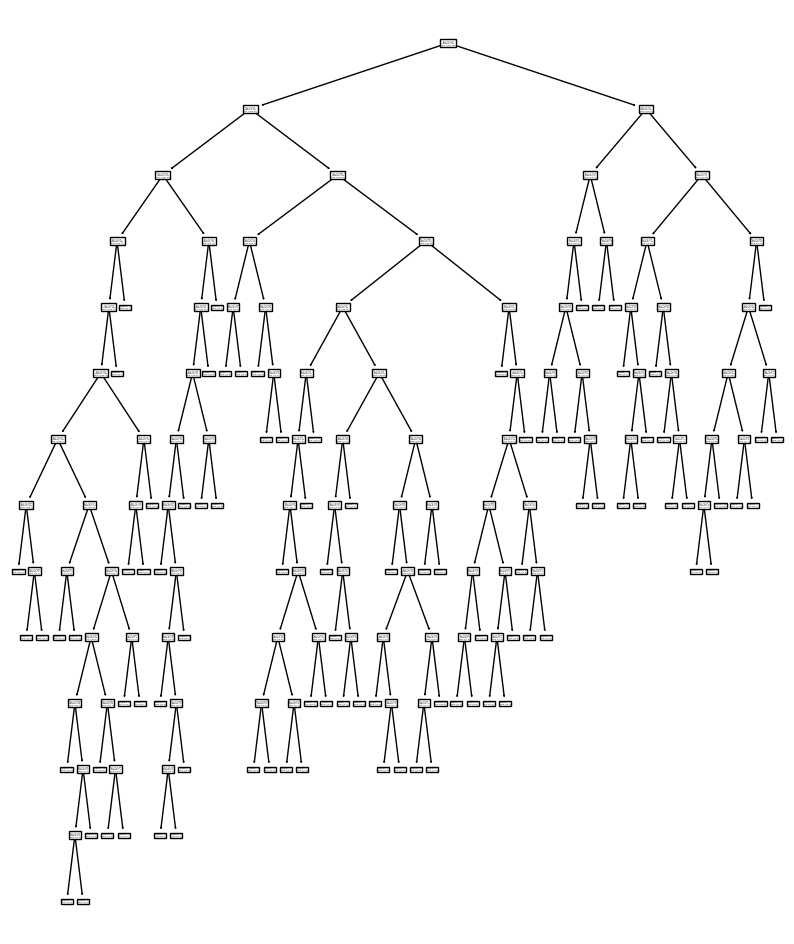

In [21]:
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(clf)
plt.savefig('gini_tree.png')

In [22]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.734375


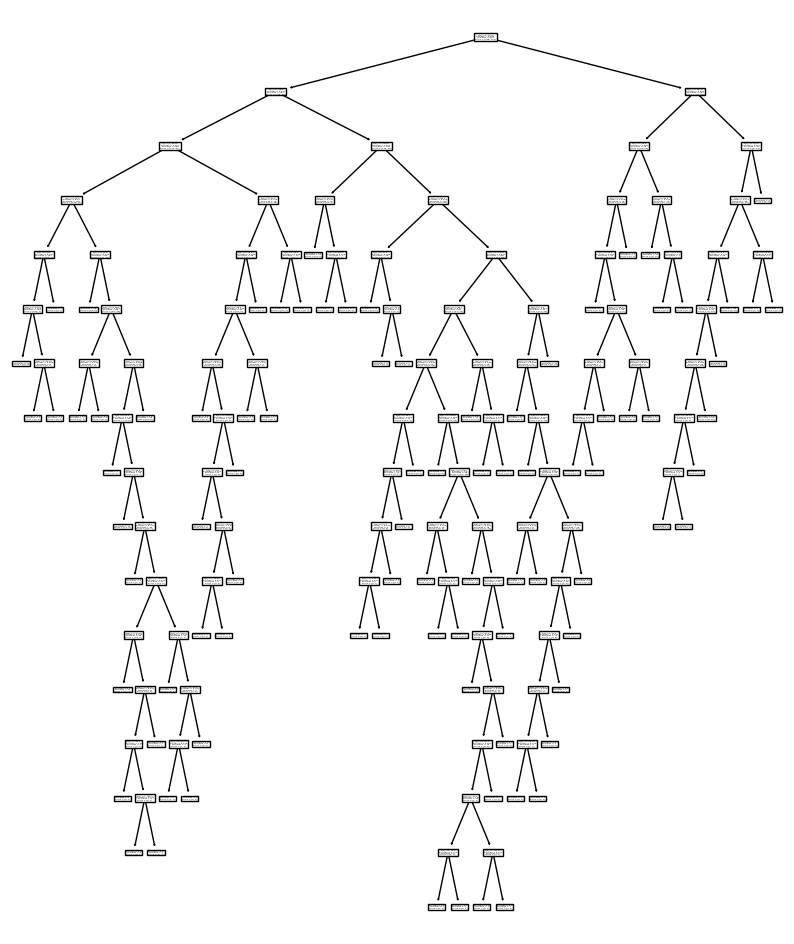

In [23]:
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(clf)
plt.savefig('entrop_tree.png')

In [24]:
l=[]
for i in range(1,12):
    clf=DecisionTreeClassifier(criterion='gini', max_depth=i,min_samples_split=6)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    l.append(accuracy_score(y_pred,y_test))
    print(l)
    print(l.index(max(l)))
    print(max(l))

[0.7578125]
0
0.7578125
[0.7578125, 0.75]
0
0.7578125
[0.7578125, 0.75, 0.765625]
2
0.765625
[0.7578125, 0.75, 0.765625, 0.7578125]
2
0.765625
[0.7578125, 0.75, 0.765625, 0.7578125, 0.7734375]
4
0.7734375
[0.7578125, 0.75, 0.765625, 0.7578125, 0.7734375, 0.796875]
5
0.796875
[0.7578125, 0.75, 0.765625, 0.7578125, 0.7734375, 0.796875, 0.7890625]
5
0.796875
[0.7578125, 0.75, 0.765625, 0.7578125, 0.7734375, 0.796875, 0.7890625, 0.734375]
5
0.796875
[0.7578125, 0.75, 0.765625, 0.7578125, 0.7734375, 0.796875, 0.7890625, 0.734375, 0.7421875]
5
0.796875
[0.7578125, 0.75, 0.765625, 0.7578125, 0.7734375, 0.796875, 0.7890625, 0.734375, 0.7421875, 0.671875]
5
0.796875
[0.7578125, 0.75, 0.765625, 0.7578125, 0.7734375, 0.796875, 0.7890625, 0.734375, 0.7421875, 0.671875, 0.7109375]
5
0.796875


In [25]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=6)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.796875


In [26]:
l=[]
min_samples_split_values = np.arange(2, 11, 1)  # Using integers within a reasonable range

for i in min_samples_split_values:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    l.append(accuracy_score(y_pred, y_test))

print(l)
print(l.index(max(l)))
print(max(l))

[0.765625, 0.765625, 0.765625, 0.78125, 0.765625, 0.7734375, 0.7734375, 0.78125, 0.7734375]
3
0.78125
